## Physics 360 Final Project Report 

---

## Title:  Modeling the Ascent and Descent of Blue Origin’s New Shepard Capsule Using Numerical Methods in 2-D

## Author: Robin Nakashita

---

## Overview

This project aims to analyze the trajectory of the Blue Origin's New Shepard capsule's 11-minute journey from the ground to the Kármán Line and back to the ground. This spacecraft will experience a point of maximum stress, main engine cut-off, capsule separating from the booster, capsule passing the Kármán Line, parachutes deploying, and finally, the capsule touching down on the landing pad. This system does not have an analytic solution for all conditions, which makes it a great idea for a computational physics project. I will use numerical integration methods (Runge-Kutta) to solve the equations of motion and (Scipy/scipy.integrate.solve_ivp) to calculate the time step for each step. The model will simulate position, velocity, and acceleration as a function of time, and it will estimate how long the space crew experienced weightlessness after the capsule passed the Kármán Line. 

---

## Introduction

As space travel becomes more accessible to the general public, it becomes crucial to study the effects of Newton's Second Laws of Motion and enhance the safety of spacecraft trajectories and space missions. By modeling the trajectory of Blue Origin's New Shepard Capsule from the beginning to the end, we are able to visualize where the maximum terminal velocity of the capsule occurs. By splitting up our 2nd-Order ODE into two First-Order ODEs, we are able to numerically calculate the maximum terminal velocity for the Blue Origin capsule and the free-fall time for the space crew. The capsule will travel from $t = 0 s$ to $t = 660s$. At $t = 141s$, the engine of the capsule will cut-off, and the booster will separate from the capsule. The position and velocity will start at $x$, $y$, $v_x$, $v_y$ = $0$, respectively. The mass of the capsule will start at $m = 75,000 kg$.


Sources:
- [Blue Origin For the Benefit of Earth](https://www.blueorigin.com/new-shepard)
- [SciPy](https://scipy.org/) and Matplotlib documentation  – I am planning to use Python with these libraries for numerical integration and plotting.
- [Runge-Kutta method](https://math.libretexts.org/Courses/Monroe_Community_College/MTH_225_Differential_Equations/03%3A_Numerical_Methods/3.03%3A_The_Runge-Kutta_Method) will be implemented to solve the differential equation.
- [New Shepard Flight Test Results from Blue Origin De-Orbit Descent and Landing Tipping Point](https://video.aiaa.org/title/508b4400-f688-420c-aeba-8eaf00440835) for spacecraft (https://doi.org/10.2514/6.2022-1829)

---
## Computational Model
### Model Equations:

#### Newton’s Second Law: 
$$
m_{\rm cap}\,\frac{d^2 \vec{r}}{dt^2}
\;=\;
\underbrace{F(t)\,\hat{\jmath}}_{\displaystyle\mathbf F_{\rm thrust}}
\;+\;
\underbrace{\Bigl(-\tfrac12\,\rho(h)\,C_D\,A\,|\mathbf v|\,\mathbf v\Bigr)}_{\mathbf F_{\rm drag}}
\;+\;
\underbrace{\Bigl(+\tfrac12\,\rho(h)\,C_L\,A\,|\mathbf v|^2\,\hat{\jmath}\Bigr)}_{\mathbf F_{\rm lift}}
\;+\;
\underbrace{\Bigl(0,\,-m_{\rm cap}\,g(h)\Bigr)}_{\mathbf F_{\rm grav}}.
$$

$$
m_{\text{cap}} \frac{d^2 \vec{r}}{dt^2} = \vec{F}_{\text{thrust}} + G \cdot \frac{m_{\text{cap}}\,m_E}{(R_E + h)^2} - \frac{1}{2} \rho(h) C A v^2 + \vec{F}_{\text{lift}}
$$

$$ \vec{r}= \sqrt{x^2 + y^2}\ $$
##### Gravitational Force:
$$
\vec{F}_g = -m_c\,g(h)\
$$

$$
g(h) = g_0 \left( \frac{R_E}{R_E + h} \right)^2
$$
##### Drag Force:
$$
\vec{F}_{\text{drag}} = -\frac{1}{2} \rho(h)\, C_D\, A\, |\vec{v}|\, \hat{v}
$$
##### Lift Force:
$$
\vec{F}_{\text{lift}} = \frac{1}{2} \rho(h)\, C_L\, A\, |\vec{v}|^2\, \hat{j}
$$
##### Atmospheric Density:
$$
\rho(h) = \rho_0 \exp\left(-\frac{h}{H}\right)
$$
---
### Define All Parameters:
#### 1. State Vector

$$
\vec{Y}(t) = 
\begin{bmatrix}
x(t) \\
y(t) \\
v_x(t) \\
v_y(t) \\
m
\end{bmatrix}
$$

#### 2. 2D Equations of Motion with Drag and Gravity
##### Velocity in X-Direction:
$$ 
\dot{x} = v_x(t) 
$$
##### Velocity in Y-Direction:
$$ 
\dot{y} = v_y(t) 
$$
##### Mass Flow Rate
$$ 
\dot{m} = -\frac{F(t)}{I_{\!sp}\,g_0} 
$$ 

#### 3. Split Up the 2nd-Order ODE into two  First Order ODE's
##### Acceleration in X-Direction:
$$ 
\dot{v_x} = -\frac{1}{2\,m_{\rm cap}}\,\rho(y)\,C_D\,A\;v\;v_x 
$$ 
##### Acceleration in Y-Direction:
$$ \dot{v_y} = \frac{F(t)}{m_{\rm cap}}
   \;-\;g(y)
   \;-\;\frac{1}{2\,m_{\rm cap}}\,\rho(y)\,C_D\,A\;v\;v_y
   \;+\;\frac{1}{2\,m_{\rm cap}}\,\rho(y)\,C_L\,A\,v^2 
$$
   
---
### Define the Initial Parameters and Boundary Conditions:

#### Initial Conditions

- **x(0)** = 0 m  
- **y(0)** = 0 m  
- **vx(0)** = 0 m/s  
- **vy(0)** = 0 m/s
- **m(0)** = 75_000 kg
---
### Constants:

| Symbol          | Description                                     | Value               | Units       |
|-----------------|-------------------------------------------------|--------------------:|----------:  |
| `G`             | Gravitational Constant                          | 6.67430e-11         | m^3 /kg/s^2 |
| `g0`            | Sea-level gravity                               | 9.80665             | m/s^2       |
| `RE`            | Radius of Earth                                 | 6_371_000           | m           |
| `mE`            | Mass of Earth                                   | 5.972e24            | kg          |
| `m_c`           | Mass of capsule + booster                       | 75_000              | kg          |
| `m_booster`     | Mass of booster                                 | 55_000              | kg          |
| `rho0`          | Air density at sea level                        | 1.225               | kg/m^3      |
| `H`             | Scale height of atmosphere                      | 8500                | m           |
| `CD_main`       | Drag coefficient                                | 1.5                 | -           |
| `CD_drogue`     | Drag coefficient                                | 1.5                 | -           |
| `t_burn`        | Engine burn time                                | 141                 | s           |
| `F_thrust`      | Peak thrust                                     | 1.5e6               | N           |
| `h_drogue`      | Small Parachute deploy altitude                 | 50_000.0            | m           |
| `A_drogue`      | Small Parachute area                            | 50                  | m^2         |
| `h_main`        | Main deploy altitude                            | 11_000              | m           |
| `A_main`        | Main Parachute area                             | 200                 | m^2         |
| `Isp`           | BE-3 vacuum specific impulse                    | 376                 | s           |

---
### Computation:

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants & Parameters 
G = 6.67430e-11          # Gravitational constant [m^3/kg/s^2]
RE = 6.371e6             # Earth radius [m]
mE = 5.972e24            # Earth mass [kg]
g0 = 9.80665             # Sea-level gravity [m/s^2]
Isp = 376.0              # BE-3 vacuum specific impulse [s]

# Engine & Mass
m_c = 75_000.0           # Initial total mass [kg]
m_booster = 55_000.0     # Mass of booster [kg]
t_burn = 141.0           # Engine burn time [s]
F_thrust = 1.5e6         # Peak thrust [N]

# Parachutes
h_drogue = 50_000.0      # Small Parachute deploy altitude [m]
A_drogue = 50.0          # Small Parachute area [m^2]
CD_drogue = 1.5          # Small Parachute drag coefficient
h_main = 11_000.0        # Main deploy altitude [m]
A_main = 200.0           # Main parachute area [m^2]
CD_main = 1.5            # Main drag coefficient

# Atmosphere
rho0 = 1.225             # Sea-level density [kg/m^3]
H = 8500.0               # Scale height [m]

In [6]:
# Gravitational Variation
def g(h):
    return G * mE / (RE + h)**2

# Exponential Atmospheric Density
def rho(h):
    return rho0 * np.exp(-h / H)

# Trapezoidal thrust: Go up 5s, coasting, go down 5s
def thrust_profile(t):
    if t < 5:
        return F_thrust * (t / 5)
    elif t < t_burn - 5:
        return F_thrust
    elif t < t_burn:
        return F_thrust * ((t_burn - t) / 5)
    else:
        return 0.0

# Phase 1: Powered Ascent in 2-D 
def phase1_2d(t, s):
    x, y, vx, vy, m = s
    F = thrust_profile(t)
    mdot = -F / (Isp * g0)
    v = np.hypot(vx, vy)
    a_drag_mag = 0.5 * rho(y) * CD_drogue * A_drogue * v**2 / m
    ax_drag = -a_drag_mag * (vx / v) if v else 0.0
    ay_drag = -a_drag_mag * (vy / v) if v else 0.0
    a_thrust = F / m
    a_grav   = -g(y)
    return [vx, vy, ax_drag, a_thrust + a_grav + ay_drag, mdot]

#  Phase 2: Coast 
def phase2_2d(t, s):
    x, y, vx, vy = s
    v = np.hypot(vx, vy)
    a_drag_mag = 0.5 * rho(y) * CD_drogue * A_drogue * v**2 / m_cutoff
    ax = -a_drag_mag * (vx / v) if v else 0.0
    ay = -g(y) - (a_drag_mag * (vy / v) if v else 0.0)
    return [vx, vy, ax, ay]

# Phase 3: Small Parachute‐slowed Descent 
def phase3_2d(t, s):
    x, y, vx, vy = s
    v = np.hypot(vx, vy)
    a_drag_mag = 0.5 * rho(y) * CD_drogue * A_drogue * v**2 / m_cutoff
    ax = -a_drag_mag * (vx / v) if v else 0.0
    ay = -g(y) - (a_drag_mag * (vy / v) if v else 0.0)
    return [vx, vy, ax, ay]

# Phase 4: Main Parachute Descent 
def phase4_2d(t, s):
    x, y, vx, vy = s
    v = np.hypot(vx, vy)
    a_drag_mag = 0.5 * rho(y) * CD_main * A_main * v**2 / m_cutoff
    ax = -a_drag_mag * (vx / v) if v else 0.0
    ay = -g(y) - (a_drag_mag * (vy / v) if v else 0.0)
    return [vx, vy, ax, ay]

# Event Definitions
# Phase 1 
def cutoff_event(t, s): return t - t_burn
cutoff_event.terminal = True; cutoff_event.direction = 1

# Phase 2
def drogue_event(t, s): return s[1] - h_drogue
drogue_event.terminal = True; drogue_event.direction = -1

# Phase 3
def main_event(t, s): return s[1] - h_main
main_event.terminal = True; main_event.direction = -1

# Phase 4
def ground_event(t, s): return s[1]
ground_event.terminal = True; ground_event.direction = -1

# Integrate Phase 1
sol1 = solve_ivp(
    phase1_2d, [0, 200], [0, 0, 0, 0, m_c],
    events=cutoff_event, max_step=0.1)

t1 = sol1.t
x1, y1, vx1, vy1, m1 = sol1.y
m_cutoff = m1[-1]

# grab the time and state at cutoff
t_sep, x_sep, y_sep, vx_sep, vy_sep, m_end = (
    sol1.t_events[0][0],
    *sol1.y_events[0][0]
)
print(f"Booster separates at t = {t_sep:.1f} s, height = {y_sep:.1f} m")

# now subtract the booster mass
m_cutoff = abs(m_end - m_booster)
print(f"Post‐sep mass = {m_cutoff:.1f} kg")

# Integrate Phase 2
sol2 = solve_ivp(
    phase2_2d, [t1[-1], 660], [x1[-1], y1[-1], vx1[-1], vy1[-1]],
    events=drogue_event, max_step=0.1)

t2 = sol2.t
x2, y2, vx2, vy2 = sol2.y

# Integrate Phase 3 
sol3 = solve_ivp(
    phase3_2d, [t2[-1], 660], [x2[-1], y2[-1], vx2[-1], vy2[-1]],
    events=main_event, max_step=0.1)

t3 = sol3.t
x3, y3, vx3, vy3 = sol3.y

# Integrate Phase 4 
sol4 = solve_ivp(
    phase4_2d, [t3[-1], 660], [x3[-1], y3[-1], vx3[-1], vy3[-1]],
    events=ground_event, max_step=0.1)

t4 = sol4.t
x4, y4, vx4, vy4 = sol4.y

# Concatenate
t_all  = np.hstack([t1, t2, t3, t4])
x_all  = np.hstack([x1, x2, x3, x4])
y_all  = np.hstack([y1, y2, y3, y4])
vx_all = np.hstack([vx1, vx2, vx3, vx4])
vy_all = np.hstack([vy1, vy2, vy3, vy4])

# Compute speed & acceleration 
speed   = np.hypot(vx_all, vy_all)
acc_x   = np.gradient(vx_all, t_all)
acc_y   = np.gradient(vy_all, t_all)
acc_mag = np.hypot(acc_x, acc_y)

Booster separates at t = 141.0 s, height = 51869.6 m
Post‐sep mass = 35325.0 kg


### Plot the Position, Velocity, and Acceleration as a Function of Time. 

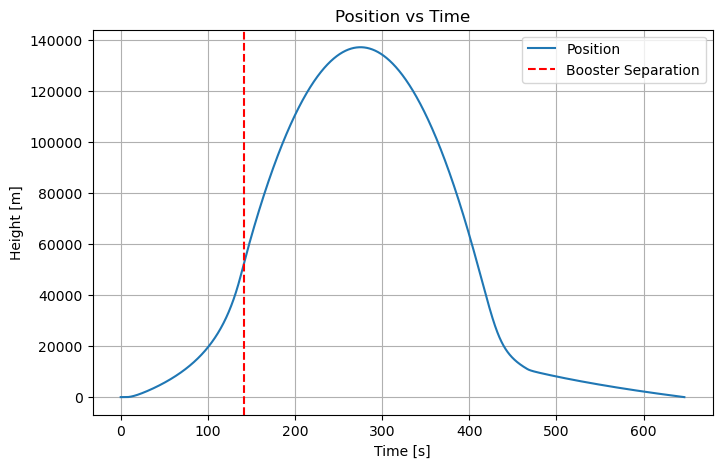

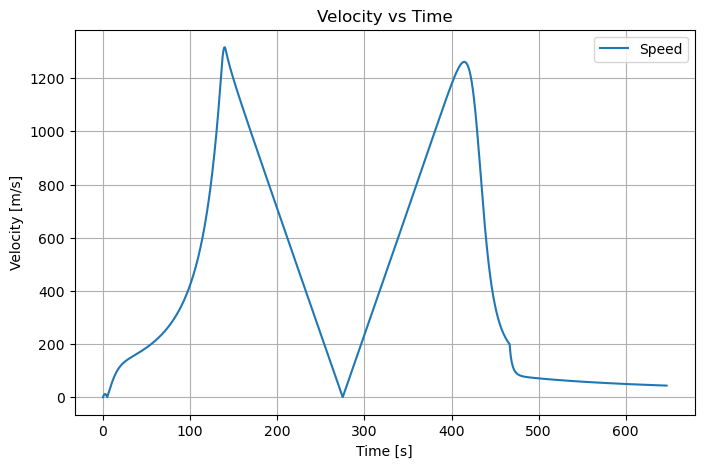

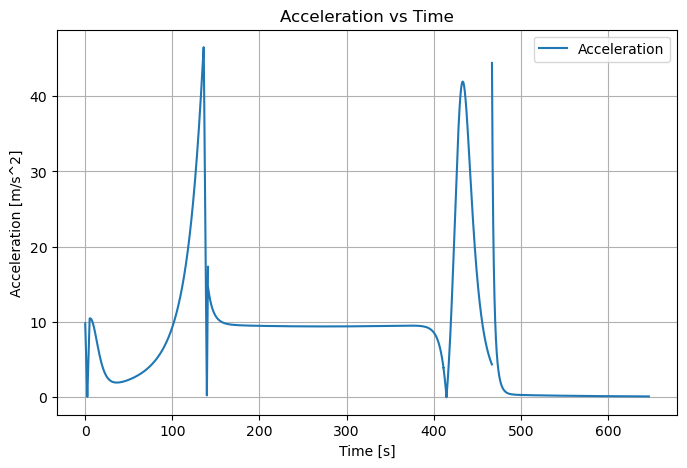

In [3]:
# Plot the figure

# Position vs. Time
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(t_all, y_all, label = "Position")
ax.axvline(t_sep, color ='red', linestyle='--', label = 'Booster Separation')
ax.set(xlabel='Time [s]', ylabel='Height [m]', title = 'Position vs Time')
ax.grid(True)
ax.legend()

# Velocity vs. Time
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(t_all, speed, label = "Speed")
ax.set(xlabel = 'Time [s]', ylabel = 'Velocity [m/s]', title = 'Velocity vs Time')
ax.grid(True)
ax.legend()

# Acceleration vs. Time
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(t_all, acc_mag, label =  "Acceleration")
ax.set(xlabel = 'Time [s]', ylabel = 'Acceleration [m/s^2]', title = 'Acceleration vs Time')
ax.grid(True)
ax.legend()

plt.show()

## Results
### Calculate the maximum terminal speed of the capsule during the ascent.

In [4]:
# Terminal Speed During Ascent
def phase1(t, s):
    y, v, m = s
    F = thrust_profile(t)
    mdot = -F / (Isp * g0)
    a_thrust = F / m
    a_grav   = -g(y)
    a_drag   = -0.5 * rho(y) * CD_drogue * A_drogue * v * abs(v) / m
    return [v, a_thrust + a_grav + a_drag, mdot]

# Integrate phase 1
sol = solve_ivp(phase1, [0, t_burn], [0, 0, m_c], max_step=0.1)
t1, y1, v1, m1 = sol.t, sol.y[0], sol.y[1], sol.y[2]

# Compute instantaneous terminal speed
vt1 = np.sqrt(2 * m1 * g(y1) / (rho(y1) * CD_drogue * A_drogue))

# Print key values
print(f"Maximum terminal speed during ascent = {vt1.max():.1f} m/s")

Maximum terminal speed during ascent = 1359.9 m/s


### Calculate the time the space crew spent above the Kármán line (100 km).

In [5]:
# Time spent above the Kármán line (100 km)
mask = y_all >= 100_000  # altitude >= 100,000 m
t_enter = t_all[mask][0]
t_exit  = t_all[mask][-1]
time_in_space = t_exit - t_enter

print(f"Capsule crosses 100 km at t = {t_enter:.1f} s")
print(f"Capsule falls back below 100 km at t = {t_exit:.1f} s")
print(f"Total time above 100 km: {time_in_space:.1f} s")

Capsule crosses 100 km at t = 186.5 s
Capsule falls back below 100 km at t = 363.8 s
Total time above 100 km: 177.3 s


## Discussion
In my simulation, the capsule starts at $t = 0 s$, and the booster separates from the capsule at $t = 141 s$. Moreover, the capsule separated at a height of $51869.6m$. The mass of the capsule after the separation is $35325kg$. The actual separation time from the booster was $t = 160s$. 

My maximum terminal speed for the Blue Shepard simulation was $1359.9m/s$. The actual maximum terminal speed was $1275.8m/s$ according to [sources](https://www.blueorigin.com/new-shepard). 

The time the space crew spent above the Kármán line was $177.3s$ in my simulation. The actual time spent above the Kármán line was approximately $180s$. The total time the simulation took was $660s$. The Actual total time of the Blue Origin New Shepard Capsule was $660s$.